In [1]:
#importo librerias

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization


# Preprocesado, modelado y métricas:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline


Genero 3 matrices:
1 - Uniforme
2 - Normal
3 - Sesgada

In [ ]:
#Genero la matriz uniforme de 200 datos / Uso random.uniform(low=0.0, high=1.0, size=None) para generar los datos low me muestra
#el limite inferior por lo que todos los valores van a ser superior o igual a este numero, High muestra el limite superior y 
# size muestra el tamaño
XU_train1=np.random.uniform(0,1,100)
XU_train2=np.random.uniform(1.5,2,100)
XU=np.append(XU_train1, XU_train2, axis=0)
XU

In [8]:
#Genero la matriz normal con random.normal(loc=0.0, scale=1.0, size=None) de Numpy donde Loc me da la media, scale la desviacion
# estandard y size la salida
XN_train1=np.random.normal(0,1,100)
XN_train2 = np.random.normal(2,1,100)
XN=np.concatenate((XN_train1,XN_train2), axis=0)
XN

array([-6.10209261e-01,  2.40099858e-02, -2.41732716e-01, -1.26019537e+00,
       -3.30332177e-01,  2.25859730e-01,  7.91852062e-01, -7.92836932e-02,
       -2.43126280e+00,  1.61726923e+00,  4.25586019e-01,  7.94977408e-01,
        7.57055757e-01,  2.07846548e-01, -1.09446791e+00,  2.86637779e-01,
        3.25795025e-02, -1.43316290e+00, -8.54652402e-01, -2.43808638e+00,
        1.09701326e+00,  1.44867421e-01, -1.74754416e-01,  6.62576978e-01,
       -9.03754492e-01, -9.89704483e-01, -7.62437104e-01, -1.03005981e+00,
       -6.30941159e-01, -4.31337151e-01, -5.59831096e-01, -1.13367776e+00,
       -2.92697861e-01,  5.83302925e-01,  3.63772508e-01, -5.02422136e-02,
        4.22411609e-02,  3.90055475e-01, -6.87104980e-01,  5.68476532e-01,
       -2.06432449e-01, -6.89791870e-01, -1.96399306e-01,  1.59213552e-02,
       -5.04149500e-01, -1.04851244e+00, -6.00257137e-02,  1.65699020e+00,
       -9.69843371e-01,  5.87421112e-01, -7.42871903e-01,  1.68565992e-02,
        5.31969935e-01,  

In [9]:
#Genero una matriz sesgada de 200 datos. Uso random.lognormal(mean=0.0, sigma=1.0, size=None), donde mean es la media de la dist
#normal q se deriva y sigma el desvio estandard de la distribucion normal que se deriva, size es la salida.

XS_train1=np.random.lognormal(0,1,100)
XS_train2 = np.random.lognormal(4,1,100)
XS=np.concatenate((XS_train1, XS_train2), axis=0)
XS

array([1.78666686e+00, 2.65126420e+00, 3.18738657e+00, 2.52467270e-02,
       2.16327875e+00, 6.99408705e+00, 3.54223102e-01, 4.15947418e+00,
       5.09488425e+00, 1.76246028e+00, 5.12074918e-01, 4.76202994e+00,
       1.50444054e+00, 9.98441902e-01, 1.44695241e+00, 4.62086819e+00,
       1.90239636e+00, 9.57392070e-01, 2.11320570e+00, 4.49948505e-01,
       2.94117798e+00, 9.01943284e-01, 7.97622171e-01, 1.27118098e+00,
       1.39347880e+00, 2.56420471e-01, 1.26810919e+00, 4.39838136e-01,
       2.71183660e+00, 4.66147983e-01, 2.44750149e+00, 4.77231982e-01,
       4.47661431e+00, 5.93512140e-01, 2.07682509e-01, 1.61623947e-01,
       1.51775061e+00, 7.40100969e-01, 4.53603402e-01, 3.55612455e+00,
       8.03732438e-01, 2.04205894e+00, 1.26202347e+00, 1.73151955e+00,
       1.15041351e+00, 3.34676260e-01, 1.10244720e+00, 1.77466864e+00,
       5.89104240e-01, 6.36465309e-01, 1.66811292e-01, 1.27164501e+00,
       2.59731614e-01, 4.77041394e+00, 1.19421502e+00, 2.44635785e+00,
      

Media de la matriz Normal


In [10]:
print("La media de la distribucion normal es: ",np.mean(XN))

La media de la distribucion normal es:  0.8849673303047286


Varianza de la distribucion Normal

In [11]:
print("La varianza de la distribucion normal es: ",np.var(XN))

La varianza de la distribucion normal es:  1.8938367444057655


In [12]:
# Hago una matriz de 3 columnas donde cada columna es una de las distrubuciones
X=np.append([XU],[XN],axis=0)
X=np.append(X,[XS], axis=0)
X

array([[ 3.99631795e-01,  9.13747795e-01,  6.13094953e-01,
         9.27648201e-01,  8.36292212e-01,  3.50549720e-01,
         4.76495090e-01,  1.54817725e-01,  5.61353151e-02,
         1.40033530e-01,  6.97084421e-01,  2.23505845e-01,
         1.15297697e-01,  5.37936715e-01,  1.36425844e-01,
         2.12503514e-01,  6.06547607e-01,  6.98616087e-01,
         5.58353453e-01,  5.00614949e-01,  4.18051997e-01,
         9.62065442e-01,  9.12164602e-01,  2.46488826e-01,
         8.67331355e-01,  8.62241795e-02,  2.91387805e-01,
         9.07424613e-01,  7.42545088e-02,  6.71404164e-01,
         2.11853010e-01,  9.31118257e-01,  4.47460559e-01,
         4.04821153e-01,  5.13955604e-01,  3.33306790e-01,
         5.90759117e-01,  7.03842362e-02,  9.70382107e-01,
         1.57544731e-01,  6.43833076e-01,  9.13420471e-01,
         3.56073563e-01,  3.91810189e-01,  8.06071936e-01,
         9.57670078e-01,  6.59030236e-01,  3.28504582e-01,
         1.28334912e-01,  3.86996769e-01,  8.98430410e-0

In [13]:
X.shape

(3, 200)

In [15]:
#Hago un dataframe
df = pd.DataFrame(list(zip(XN,XU,XS)))
df

,0,1,2
0,-0.610209,0.399632,1.786667
1,0.024010,0.913748,2.651264
2,-0.241733,0.613095,3.187387
3,-1.260195,0.927648,0.025247
4,-0.330332,0.836292,2.163279
...,...,...,...
195,0.571933,1.944887,127.706081
196,2.357601,1.806841,87.997601
197,-0.241066,1.645480,43.220873
198,1.426583,1.936882,103.464406


In [17]:
#Convierto el DataFrane de Pandas en un Array de numpy
X_np = df.to_numpy()
X_np

array([[-6.10209261e-01,  3.99631795e-01,  1.78666686e+00],
       [ 2.40099858e-02,  9.13747795e-01,  2.65126420e+00],
       [-2.41732716e-01,  6.13094953e-01,  3.18738657e+00],
       [-1.26019537e+00,  9.27648201e-01,  2.52467270e-02],
       [-3.30332177e-01,  8.36292212e-01,  2.16327875e+00],
       [ 2.25859730e-01,  3.50549720e-01,  6.99408705e+00],
       [ 7.91852062e-01,  4.76495090e-01,  3.54223102e-01],
       [-7.92836932e-02,  1.54817725e-01,  4.15947418e+00],
       [-2.43126280e+00,  5.61353151e-02,  5.09488425e+00],
       [ 1.61726923e+00,  1.40033530e-01,  1.76246028e+00],
       [ 4.25586019e-01,  6.97084421e-01,  5.12074918e-01],
       [ 7.94977408e-01,  2.23505845e-01,  4.76202994e+00],
       [ 7.57055757e-01,  1.15297697e-01,  1.50444054e+00],
       [ 2.07846548e-01,  5.37936715e-01,  9.98441902e-01],
       [-1.09446791e+00,  1.36425844e-01,  1.44695241e+00],
       [ 2.86637779e-01,  2.12503514e-01,  4.62086819e+00],
       [ 3.25795025e-02,  6.06547607e-01

In [20]:
y_np =np.array([0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1])
y_np

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [22]:
y_np.shape

(200,)

Text(0, 0.5, 'Dist. Sesgada')

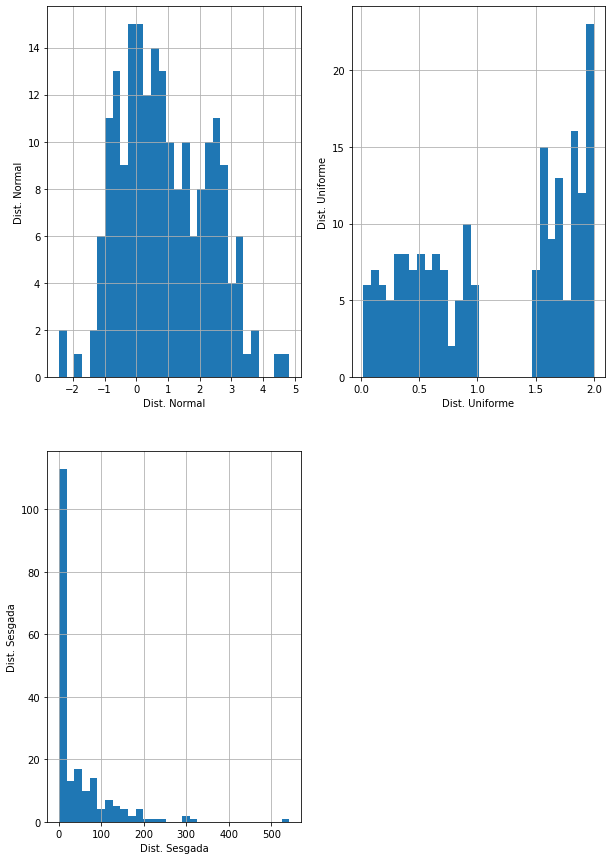

In [23]:
plt.figure(figsize = (10,15))

plt.subplot(2,2,1)
fig =df[0].hist(bins=30)
fig.set_xlabel('Dist. Normal')
fig.set_ylabel('Dist. Normal')

plt.subplot(2,2,2)
fig =df[1].hist(bins=30)
fig.set_xlabel('Dist. Uniforme')
fig.set_ylabel('Dist. Uniforme')

plt.subplot(2,2,3)
fig =df[2].hist(bins=30)
fig.set_xlabel('Dist. Sesgada')
fig.set_ylabel('Dist. Sesgada')

In [24]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_np,y_np,test_size=0.2)

In [25]:
print('X_train:',len(X_train))
print('X_test:  ',len(X_test))
print('y_train:',len(y_train))
print('y_test:  ',len(y_test))

X_train: 160
X_test:   40
y_train: 160
y_test:   40


In [26]:
model = LogisticRegression()

In [27]:
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_predicha = model.predict(X_test)
y_predicha

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [29]:
#Matriz de confusion
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_predicha)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[11  0]
 [ 0 29]]


<AxesSubplot:>

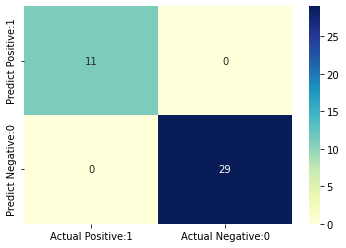

In [30]:
matrix = pd.DataFrame(data=matriz, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')